In [42]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
import json
from scipy.stats import zscore

In [43]:
os.chdir('C:/Storage/StudyJourney/Nam3/Cs114/Project2')

In [44]:
df = pd.read_csv('Dataset./annonimized.csv')
df

,assignment_id,problem_id,username,is_final,status,pre_score,coefficient,language_id,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10/9/2025 8:02,10/9/2025 8:06,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10/9/2025 8:04,10/9/2025 8:04,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10/9/2025 8:06,10/9/2025 8:06,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10/9/2025 8:47,10/9/2025 8:48,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10/9/2025 9:19,10/9/2025 9:19,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,1/15/2025 16:03,1/15/2025 16:03,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,1/15/2025 16:04,1/15/2025 16:05,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func..."
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,1/15/2025 16:04,1/15/2025 16:05,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,1/15/2025 16:05,1/15/2025 16:05,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0..."


In [45]:
from datetime import datetime
import pandas as pd

reference_date = datetime(2023, 9, 1)

# Chuyển đổi 'created_at' và 'updated_at' thành ordinal và thêm đặc trưng chênh lệch ngày
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['updated_at'] = pd.to_datetime(df['updated_at'], errors='coerce')
df['created_at_ordinal'] = (df['created_at'] - reference_date).dt.days
df['updated_at_ordinal'] = (df['updated_at'] - reference_date).dt.days


In [46]:
df['date_diff'] = (df['updated_at'] - df['created_at']).dt.days


In [47]:
df = df.drop(columns=["language_id", "coefficient"])


In [48]:
df

,assignment_id,problem_id,username,is_final,status,pre_score,created_at,updated_at,judgement,created_at_ordinal,updated_at_ordinal,date_diff
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,2025-10-09 08:02:00,2025-10-09 08:06:00,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",769,769,0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,2025-10-09 08:04:00,2025-10-09 08:04:00,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",769,769,0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,2025-10-09 08:06:00,2025-10-09 08:06:00,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",769,769,0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,2025-10-09 08:47:00,2025-10-09 08:48:00,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",769,769,0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,2025-10-09 09:19:00,2025-10-09 09:19:00,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",769,769,0
...,...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,2025-01-15 16:03:00,2025-01-15 16:03:00,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":...",502,502,0
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,2025-01-15 16:04:00,2025-01-15 16:05:00,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func...",502,502,0
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,2025-01-15 16:04:00,2025-01-15 16:05:00,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":...",502,502,0
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,2025-01-15 16:05:00,2025-01-15 16:05:00,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0...",502,502,0


In [49]:
submission_count = df.groupby(['username', 'assignment_id', 'problem_id']).size().reset_index(name='submission_count')
submission_count

,username,assignment_id,problem_id,submission_count
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,3615cda544b70e563e7f14ca39255ff571d15939,2
1,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,3745379e0eb86b4f0d1b20d4545fa05a1008e47b,1
2,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,a5f452a6be396232c5ebff95db79ffab6b36a9e5,1
3,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,a692996453485b2622812e33a54c42f42adb3fc1,1
4,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,c7f8defb4e86dfe1643af595a70ab549160dbf4a,1
...,...,...,...,...
95961,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,91908ebb9760444bea691ff8619e0a67a2f9fcef,5
95962,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,b31df36d4dbdf78290b915f20595a9f7baced9c3,3
95963,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,d3d8534c6cf68a2043b76a3ab71d7e9eaeb7b0ba,4
95964,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,e8b67e20b62d0aa42092538a5983c71604bd40e9,15


In [50]:
status_count = df.groupby(['username', 'assignment_id', 'problem_id'])['status'].value_counts().unstack(fill_value=0).reset_index()
status_count

status,username,assignment_id,problem_id,Compilation Error,SCORE,Syntax Error,pending
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,3615cda544b70e563e7f14ca39255ff571d15939,0,2,0,0
1,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,3745379e0eb86b4f0d1b20d4545fa05a1008e47b,0,1,0,0
2,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,a5f452a6be396232c5ebff95db79ffab6b36a9e5,0,1,0,0
3,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,a692996453485b2622812e33a54c42f42adb3fc1,0,1,0,0
4,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,c7f8defb4e86dfe1643af595a70ab549160dbf4a,0,1,0,0
...,...,...,...,...,...,...,...
95961,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,91908ebb9760444bea691ff8619e0a67a2f9fcef,1,4,0,0
95962,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,b31df36d4dbdf78290b915f20595a9f7baced9c3,0,3,0,0
95963,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,d3d8534c6cf68a2043b76a3ab71d7e9eaeb7b0ba,0,4,0,0
95964,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,e8b67e20b62d0aa42092538a5983c71604bd40e9,5,10,0,0


In [51]:
avg_score = df.groupby(['username', 'assignment_id', 'problem_id'])['pre_score'].mean().reset_index(name='avg_score')
avg_score

,username,assignment_id,problem_id,avg_score
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,3615cda544b70e563e7f14ca39255ff571d15939,7000.000000
1,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,3745379e0eb86b4f0d1b20d4545fa05a1008e47b,10000.000000
2,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,a5f452a6be396232c5ebff95db79ffab6b36a9e5,10000.000000
3,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,a692996453485b2622812e33a54c42f42adb3fc1,10000.000000
4,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,c7f8defb4e86dfe1643af595a70ab549160dbf4a,10000.000000
...,...,...,...,...
95961,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,91908ebb9760444bea691ff8619e0a67a2f9fcef,4000.000000
95962,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,b31df36d4dbdf78290b915f20595a9f7baced9c3,3333.333333
95963,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,d3d8534c6cf68a2043b76a3ab71d7e9eaeb7b0ba,8250.000000
95964,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,e8b67e20b62d0aa42092538a5983c71604bd40e9,4266.666667


In [52]:
df

,assignment_id,problem_id,username,is_final,status,pre_score,created_at,updated_at,judgement,created_at_ordinal,updated_at_ordinal,date_diff
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,2025-10-09 08:02:00,2025-10-09 08:06:00,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",769,769,0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,2025-10-09 08:04:00,2025-10-09 08:04:00,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",769,769,0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,2025-10-09 08:06:00,2025-10-09 08:06:00,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",769,769,0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,2025-10-09 08:47:00,2025-10-09 08:48:00,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",769,769,0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,2025-10-09 09:19:00,2025-10-09 09:19:00,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",769,769,0
...,...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,2025-01-15 16:03:00,2025-01-15 16:03:00,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":...",502,502,0
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,2025-01-15 16:04:00,2025-01-15 16:05:00,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func...",502,502,0
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,2025-01-15 16:04:00,2025-01-15 16:05:00,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":...",502,502,0
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,2025-01-15 16:05:00,2025-01-15 16:05:00,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0...",502,502,0


In [53]:
error_rate = df.groupby(['username', 'assignment_id', 'problem_id'])['judgement'].apply(lambda x: x.str.contains('WRONG').sum() / len(x)).reset_index(name='error_rate')

# Tính tỷ lệ bài cuối cùng
final_submission_rate = df.groupby(['username', 'assignment_id', 'problem_id'])['is_final'].mean().reset_index(name='final_submission_rate')


In [54]:
error_rate

,username,assignment_id,problem_id,error_rate
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,3615cda544b70e563e7f14ca39255ff571d15939,0.500000
1,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,3745379e0eb86b4f0d1b20d4545fa05a1008e47b,0.000000
2,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,a5f452a6be396232c5ebff95db79ffab6b36a9e5,0.000000
3,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,a692996453485b2622812e33a54c42f42adb3fc1,0.000000
4,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,c7f8defb4e86dfe1643af595a70ab549160dbf4a,0.000000
...,...,...,...,...
95961,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,91908ebb9760444bea691ff8619e0a67a2f9fcef,0.600000
95962,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,b31df36d4dbdf78290b915f20595a9f7baced9c3,0.666667
95963,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,d3d8534c6cf68a2043b76a3ab71d7e9eaeb7b0ba,0.750000
95964,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,e8b67e20b62d0aa42092538a5983c71604bd40e9,0.533333


In [55]:
final_submission_rate



,username,assignment_id,problem_id,final_submission_rate
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,3615cda544b70e563e7f14ca39255ff571d15939,0.500000
1,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,3745379e0eb86b4f0d1b20d4545fa05a1008e47b,1.000000
2,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,a5f452a6be396232c5ebff95db79ffab6b36a9e5,1.000000
3,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,a692996453485b2622812e33a54c42f42adb3fc1,1.000000
4,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,c7f8defb4e86dfe1643af595a70ab549160dbf4a,1.000000
...,...,...,...,...
95961,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,91908ebb9760444bea691ff8619e0a67a2f9fcef,0.200000
95962,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,b31df36d4dbdf78290b915f20595a9f7baced9c3,0.333333
95963,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,d3d8534c6cf68a2043b76a3ab71d7e9eaeb7b0ba,0.250000
95964,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,e8b67e20b62d0aa42092538a5983c71604bd40e9,0.066667


In [56]:
total_assignment_problem = df.groupby(['assignment_id', 'problem_id']).size().reset_index(name='total_count')

# Tính tỷ lệ phần trăm của mỗi sinh viên so với tổng
df_percentage = df.groupby(['username', 'assignment_id', 'problem_id']).size().reset_index(name='user_count')
df_percentage = df_percentage.merge(total_assignment_problem, on=['assignment_id', 'problem_id'])
df_percentage['percentage'] = df_percentage['user_count'] / df_percentage['total_count'] * 100

In [57]:
df_percentage

,username,assignment_id,problem_id,user_count,total_count,percentage
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,3615cda544b70e563e7f14ca39255ff571d15939,2,77,2.597403
1,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,3745379e0eb86b4f0d1b20d4545fa05a1008e47b,1,62,1.612903
2,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,a5f452a6be396232c5ebff95db79ffab6b36a9e5,1,82,1.219512
3,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,a692996453485b2622812e33a54c42f42adb3fc1,1,60,1.666667
4,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,c7f8defb4e86dfe1643af595a70ab549160dbf4a,1,58,1.724138
...,...,...,...,...,...,...
95961,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,91908ebb9760444bea691ff8619e0a67a2f9fcef,5,242,2.066116
95962,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,b31df36d4dbdf78290b915f20595a9f7baced9c3,3,291,1.030928
95963,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,d3d8534c6cf68a2043b76a3ab71d7e9eaeb7b0ba,4,458,0.873362
95964,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,e8b67e20b62d0aa42092538a5983c71604bd40e9,15,547,2.742230


In [58]:
from scipy import stats

# Tính Z-score
df['z_score'] = stats.zscore(df['pre_score'])

# Đánh dấu các giá trị ngoại lai (Z-score > 3 hoặc < -3)
df['is_outlier'] = df['z_score'].apply(lambda x: 1 if abs(x) > 3 else 0)


In [59]:
# Tạo vector tần suất 24 giờ
df['hour'] = df['created_at'].dt.hour
hourly_activity = df.groupby(['username', 'assignment_id', 'problem_id'])['hour'].value_counts().unstack(fill_value=0).reset_index()


In [60]:
submission_by_assignment_problem = df.groupby(['username', 'assignment_id', 'problem_id']).size().unstack(fill_value=0).reset_index()
submission_by_assignment_problem

problem_id,username,assignment_id,008f8e9b0f4fac6b5f188f0dc8d118a8b19aabee,013e2f57867e3ab62d2043beecedade7ea6cf545,017ff00dd3fe1e6f8297b5061215343742259f6a,027fd74619cb74676a464759ddfeb06457d80aa4,028df0dceb107528f66ee892dae5ded64b21d470,03918d9c6e62e84d631d42f35278e466e91fac05,03aa28c6280c37962abcc11612cbbe14e3e25756,04681b16ae128da4be6bcdf7ae98b4c294ed20b5,...,fc32b6966d3797fd8b485d8f61fe83e1dd62abf6,fc63e9a7e711717cbd2d94f2056830b3cc39e6d4,fc75f9dbe4c216b9d90808df4c6e5facb7212b8b,fd5acaa23983406b9aa2da5265639ff1b54d0794,fd66e6bd78793b313c05943e82c744e61aa215cf,fd761cbe57c9f2eea1cdebc5cc708fafa95dda40,fe90c40607a0d2caacfc1b1083de4e3f6a6c9c10,ff75347a4671d84aba7db89af5a1de668661f692,ffbf74d579d9fef54254fb6ee0a579d26b052ecc,ffd176ba6494736bdff4d845f6d0c833a304b8de
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00b6dd4fc7eb817e03708c532016ef30ce564a61,17cca36488024fd072307cef6dc6cb136676ddbd,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2,00b6dd4fc7eb817e03708c532016ef30ce564a61,2e12f6588fc14252ed689202f362d3e330a0dd3e,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00b6dd4fc7eb817e03708c532016ef30ce564a61,aa7fc65e0df4218a785ade6edf56231ab3e5ae2b,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00b6dd4fc7eb817e03708c532016ef30ce564a61,d0204dbfca44b08e0f01a0d9c70de22d7b270d91,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764,ffe872165621d735a48bb5db0c71dd5195cba359,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10765,ffe872165621d735a48bb5db0c71dd5195cba359,bbd98d5c6b654897954d057af9ef7ff371e0b8e3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10766,ffe872165621d735a48bb5db0c71dd5195cba359,c618f3ac561dc6be61b1a179901d41e4371c0cf1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,37,0,0,0
10767,ffe872165621d735a48bb5db0c71dd5195cba359,d48b15874b380695431de382cca4c60dcf0d7483,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df_original_unique = df.drop_duplicates(subset=['username','assignment_id', 'problem_id'])
df_original_unique

,assignment_id,problem_id,username,is_final,status,pre_score,created_at,updated_at,judgement,created_at_ordinal,updated_at_ordinal,date_diff,z_score,is_outlier,hour
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,2025-10-09 08:02:00,2025-10-09 08:06:00,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",769,769,0,-1.165787,0,8
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,2025-10-09 08:47:00,2025-10-09 08:48:00,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",769,769,0,1.115027,0,8
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,2025-10-09 09:19:00,2025-10-09 09:19:00,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",769,769,0,1.115027,0,9
5,90ce27571176d87961b565d5ef4b3de33ede04ac,d6a5bdd7f7f32364f4743854ef3b5369c0706677,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,2025-10-09 09:29:00,2025-10-09 09:30:00,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func...",769,769,0,-1.165787,0,9
7,90ce27571176d87961b565d5ef4b3de33ede04ac,8b15ab090e1e8ec3284cf78746d94ffa00bd201b,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,2025-10-09 09:32:00,2025-10-09 09:42:00,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",769,769,0,-1.165787,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295192,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,60a1fdf13294f3284ea3bb1f51ae20d8b306a010,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,2025-01-15 16:03:00,2025-01-15 16:03:00,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",502,502,0,1.115027,0,16
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,2025-01-15 16:03:00,2025-01-15 16:03:00,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":...",502,502,0,1.115027,0,16
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,2025-01-15 16:04:00,2025-01-15 16:05:00,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func...",502,502,0,-1.165787,0,16
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,2025-01-15 16:05:00,2025-01-15 16:05:00,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0...",502,502,0,1.115027,0,16


In [62]:
# Giả sử bạn có danh sách các DataFrame chứa các đặc trưng
df_features_list = [submission_count, status_count, avg_score,error_rate,final_submission_rate,df_percentage]  # Các DataFrame chứa đặc trưng

# Bắt đầu với df_original
df_final = df.copy()

# Duyệt qua từng DataFrame trong df_features_list để merge vào df_final
for df_features in df_features_list:
    # Merge từng df_features vào df_final QTeo 'username' và 'problem_id'
    df_final = df_final.merge(df_features, on=['username','assignment_id' ,'problem_id'], how='left')

# Kiểm tra kết quả
print(df_final.head())


                              assignment_id  \
0  90ce27571176d87961b565d5ef4b3de33ede04ac   
1  90ce27571176d87961b565d5ef4b3de33ede04ac   
2  90ce27571176d87961b565d5ef4b3de33ede04ac   
3  90ce27571176d87961b565d5ef4b3de33ede04ac   
4  90ce27571176d87961b565d5ef4b3de33ede04ac   

                                 problem_id  \
0  789454427dd4097a14749e3dde63346b7a8d3811   
1  789454427dd4097a14749e3dde63346b7a8d3811   
2  789454427dd4097a14749e3dde63346b7a8d3811   
3  bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff   
4  7a6e5ca470ff47c3b5048f240c4738de71010c78   

                                   username  is_final status  pre_score  \
0  ed9eaeb6a707f50154024b24d7efcb874a9795dd         0  SCORE          0   
1  ed9eaeb6a707f50154024b24d7efcb874a9795dd         0  SCORE          0   
2  ed9eaeb6a707f50154024b24d7efcb874a9795dd         1  SCORE      10000   
3  ed9eaeb6a707f50154024b24d7efcb874a9795dd         1  SCORE      10000   
4  ed9eaeb6a707f50154024b24d7efcb874a9795dd         1  SCOR

In [63]:
df_final = df_final.drop_duplicates(subset=['username','assignment_id', 'problem_id'])

In [64]:
df_final

,assignment_id,problem_id,username,is_final,status,pre_score,created_at,updated_at,judgement,created_at_ordinal,...,Compilation Error,SCORE,Syntax Error,pending,avg_score,error_rate,final_submission_rate,user_count,total_count,percentage
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,2025-10-09 08:02:00,2025-10-09 08:06:00,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",769,...,0,3,0,0,3333.333333,0.666667,0.333333,3,123,2.439024
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,2025-10-09 08:47:00,2025-10-09 08:48:00,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",769,...,0,1,0,0,10000.000000,0.000000,1.000000,1,202,0.495050
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,2025-10-09 09:19:00,2025-10-09 09:19:00,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",769,...,0,1,0,0,10000.000000,0.000000,1.000000,1,216,0.462963
5,90ce27571176d87961b565d5ef4b3de33ede04ac,d6a5bdd7f7f32364f4743854ef3b5369c0706677,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,2025-10-09 09:29:00,2025-10-09 09:30:00,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func...",769,...,1,1,0,0,5000.000000,0.000000,0.500000,2,113,1.769912
7,90ce27571176d87961b565d5ef4b3de33ede04ac,8b15ab090e1e8ec3284cf78746d94ffa00bd201b,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,2025-10-09 09:32:00,2025-10-09 09:42:00,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",769,...,5,2,0,0,2857.142857,0.000000,0.142857,7,165,4.242424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295192,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,60a1fdf13294f3284ea3bb1f51ae20d8b306a010,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,2025-01-15 16:03:00,2025-01-15 16:03:00,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",502,...,0,1,0,0,10000.000000,0.000000,1.000000,1,445,0.224719
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,2025-01-15 16:03:00,2025-01-15 16:03:00,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":...",502,...,0,1,0,0,10000.000000,0.000000,1.000000,1,280,0.357143
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,2025-01-15 16:04:00,2025-01-15 16:05:00,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func...",502,...,1,1,0,0,5000.000000,0.000000,0.500000,2,213,0.938967
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,2025-01-15 16:05:00,2025-01-15 16:05:00,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0...",502,...,0,1,0,0,10000.000000,0.000000,1.000000,1,203,0.492611


In [65]:
df_final = df_final.drop(columns=['created_at', 'updated_at', 'is_final', 'hour','status','judgement','pre_score','pending','user_count','total_count','z_score','is_outlier','created_at_ordinal','updated_at_ordinal'])

In [66]:
df_final

,assignment_id,problem_id,username,date_diff,submission_count,Compilation Error,SCORE,Syntax Error,avg_score,error_rate,final_submission_rate,percentage
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,3,0,3,0,3333.333333,0.666667,0.333333,2.439024
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,1,0,1,0,10000.000000,0.000000,1.000000,0.495050
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,1,0,1,0,10000.000000,0.000000,1.000000,0.462963
5,90ce27571176d87961b565d5ef4b3de33ede04ac,d6a5bdd7f7f32364f4743854ef3b5369c0706677,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,2,1,1,0,5000.000000,0.000000,0.500000,1.769912
7,90ce27571176d87961b565d5ef4b3de33ede04ac,8b15ab090e1e8ec3284cf78746d94ffa00bd201b,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,7,5,2,0,2857.142857,0.000000,0.142857,4.242424
...,...,...,...,...,...,...,...,...,...,...,...,...
295192,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,60a1fdf13294f3284ea3bb1f51ae20d8b306a010,232cce96362898f08e9150ba244adaf2d6583ab2,0,1,0,1,0,10000.000000,0.000000,1.000000,0.224719
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,0,1,0,1,0,10000.000000,0.000000,1.000000,0.357143
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,2,1,1,0,5000.000000,0.000000,0.500000,0.938967
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,0,1,0,1,0,10000.000000,0.000000,1.000000,0.492611


In [67]:

pivot_df = pd.pivot_table(df_final, 
                          values=['date_diff', 'submission_count', 'Compilation Error', 'SCORE','Syntax Error','avg_score' , 'error_rate', 'final_submission_rate', 'percentage'], 
                          index=['username'],  # Nhóm QTeo 'username'
                          columns='problem_id',  # Nhóm QTeo 'problem_id'
                          fill_value=0)  # Điền giá trị 0 vào các ô trống

# Hiển QTị vài dòng đầu tiên
pivot_df.columns = ['_'.join(map(str, col)).strip() for col in pivot_df.columns.values]

# In kết quả
print(pivot_df.head())


                                          Compilation Error_008f8e9b0f4fac6b5f188f0dc8d118a8b19aabee  \
username                                                                                               
00b6dd4fc7eb817e03708c532016ef30ce564a61                                                0.0            
00bef8afee8f3c595d535c9c03c490cac1a4f021                                                0.0            
01122b3ef7e59b84189e65985305f575d6bdf83c                                                1.0            
0134f9f410c65ad0e8c2254a7e9288670e02a183                                                0.0            
013de369c439ab0ead8aa7da64423aa395a8be39                                                0.0            

                                          Compilation Error_013e2f57867e3ab62d2043beecedade7ea6cf545  \
username                                                                                               
00b6dd4fc7eb817e03708c532016ef30ce564a61                       

In [68]:
pivot_df.head()

,Compilation Error_008f8e9b0f4fac6b5f188f0dc8d118a8b19aabee,Compilation Error_013e2f57867e3ab62d2043beecedade7ea6cf545,Compilation Error_017ff00dd3fe1e6f8297b5061215343742259f6a,Compilation Error_027fd74619cb74676a464759ddfeb06457d80aa4,Compilation Error_028df0dceb107528f66ee892dae5ded64b21d470,Compilation Error_03918d9c6e62e84d631d42f35278e466e91fac05,Compilation Error_03aa28c6280c37962abcc11612cbbe14e3e25756,Compilation Error_04681b16ae128da4be6bcdf7ae98b4c294ed20b5,Compilation Error_04f7906119d04c0368807ca0ca9a4d7a5293cbfe,Compilation Error_06c8bcdd51eda3b976f73de08b2efdf5eae25e2a,...,submission_count_fc32b6966d3797fd8b485d8f61fe83e1dd62abf6,submission_count_fc63e9a7e711717cbd2d94f2056830b3cc39e6d4,submission_count_fc75f9dbe4c216b9d90808df4c6e5facb7212b8b,submission_count_fd5acaa23983406b9aa2da5265639ff1b54d0794,submission_count_fd66e6bd78793b313c05943e82c744e61aa215cf,submission_count_fd761cbe57c9f2eea1cdebc5cc708fafa95dda40,submission_count_fe90c40607a0d2caacfc1b1083de4e3f6a6c9c10,submission_count_ff75347a4671d84aba7db89af5a1de668661f692,submission_count_ffbf74d579d9fef54254fb6ee0a579d26b052ecc,submission_count_ffd176ba6494736bdff4d845f6d0c833a304b8de
username,,,,,,,,,,,,,,,,,,,,,
00b6dd4fc7eb817e03708c532016ef30ce564a61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
00bef8afee8f3c595d535c9c03c490cac1a4f021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
01122b3ef7e59b84189e65985305f575d6bdf83c,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,2.0,2.0,0.0,0.0
0134f9f410c65ad0e8c2254a7e9288670e02a183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0
013de369c439ab0ead8aa7da64423aa395a8be39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
df = pivot_df
qt = pd.read_csv('Dataset/public_it001./qt-public.csv')
qt.head()

,username,QT
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,7.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,7
2,01122b3ef7e59b84189e65985305f575d6bdf83c,9
3,013de369c439ab0ead8aa7da64423aa395a8be39,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,9


In [70]:
test = pd.merge(df, qt, on='username', how='left', indicator=True)
test = test[test['_merge'] == 'left_only'].drop(columns=['_merge'])
test.head()

,username,Compilation Error_008f8e9b0f4fac6b5f188f0dc8d118a8b19aabee,Compilation Error_013e2f57867e3ab62d2043beecedade7ea6cf545,Compilation Error_017ff00dd3fe1e6f8297b5061215343742259f6a,Compilation Error_027fd74619cb74676a464759ddfeb06457d80aa4,Compilation Error_028df0dceb107528f66ee892dae5ded64b21d470,Compilation Error_03918d9c6e62e84d631d42f35278e466e91fac05,Compilation Error_03aa28c6280c37962abcc11612cbbe14e3e25756,Compilation Error_04681b16ae128da4be6bcdf7ae98b4c294ed20b5,Compilation Error_04f7906119d04c0368807ca0ca9a4d7a5293cbfe,...,submission_count_fc63e9a7e711717cbd2d94f2056830b3cc39e6d4,submission_count_fc75f9dbe4c216b9d90808df4c6e5facb7212b8b,submission_count_fd5acaa23983406b9aa2da5265639ff1b54d0794,submission_count_fd66e6bd78793b313c05943e82c744e61aa215cf,submission_count_fd761cbe57c9f2eea1cdebc5cc708fafa95dda40,submission_count_fe90c40607a0d2caacfc1b1083de4e3f6a6c9c10,submission_count_ff75347a4671d84aba7db89af5a1de668661f692,submission_count_ffbf74d579d9fef54254fb6ee0a579d26b052ecc,submission_count_ffd176ba6494736bdff4d845f6d0c833a304b8de,QT
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,NaN
20,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,13.0,0.0,0.0,NaN
68,0aaebc88f6106684d6993c156104c1ef36cf94e0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,NaN
80,0bf111a9caedf02804f6991792490e63bc21058a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,NaN
120,12887fd9a4df4ba9b88a71f3fb1d2502a75995dd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,NaN


In [71]:
merged_df = pd.merge(qt, df, on='username', how='inner')
merged_df['QT'] = (merged_df['QT']
                   .replace(['\xa0', ''], np.nan)  # Replace invalid values wiQT NaN
                   .astype(float))                 # Convert to numeric

# Calculate mean and fill NaN values
mean_QT = merged_df['QT'].mean()
merged_df['QT'] = merged_df['QT'].fillna(mean_QT)
# Display first few rows
df = merged_df
df.head()

,username,QT,Compilation Error_008f8e9b0f4fac6b5f188f0dc8d118a8b19aabee,Compilation Error_013e2f57867e3ab62d2043beecedade7ea6cf545,Compilation Error_017ff00dd3fe1e6f8297b5061215343742259f6a,Compilation Error_027fd74619cb74676a464759ddfeb06457d80aa4,Compilation Error_028df0dceb107528f66ee892dae5ded64b21d470,Compilation Error_03918d9c6e62e84d631d42f35278e466e91fac05,Compilation Error_03aa28c6280c37962abcc11612cbbe14e3e25756,Compilation Error_04681b16ae128da4be6bcdf7ae98b4c294ed20b5,...,submission_count_fc32b6966d3797fd8b485d8f61fe83e1dd62abf6,submission_count_fc63e9a7e711717cbd2d94f2056830b3cc39e6d4,submission_count_fc75f9dbe4c216b9d90808df4c6e5facb7212b8b,submission_count_fd5acaa23983406b9aa2da5265639ff1b54d0794,submission_count_fd66e6bd78793b313c05943e82c744e61aa215cf,submission_count_fd761cbe57c9f2eea1cdebc5cc708fafa95dda40,submission_count_fe90c40607a0d2caacfc1b1083de4e3f6a6c9c10,submission_count_ff75347a4671d84aba7db89af5a1de668661f692,submission_count_ffbf74d579d9fef54254fb6ee0a579d26b052ecc,submission_count_ffd176ba6494736bdff4d845f6d0c833a304b8de
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,2.0,2.0,0.0,0.0
3,013de369c439ab0ead8aa7da64423aa395a8be39,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:15:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depQT" } are not used.

  warnings.warn(smsg, UserWarning)


R^2 Score: 0.43010083528409415
Mean Squared Error: 1.7707667062964487


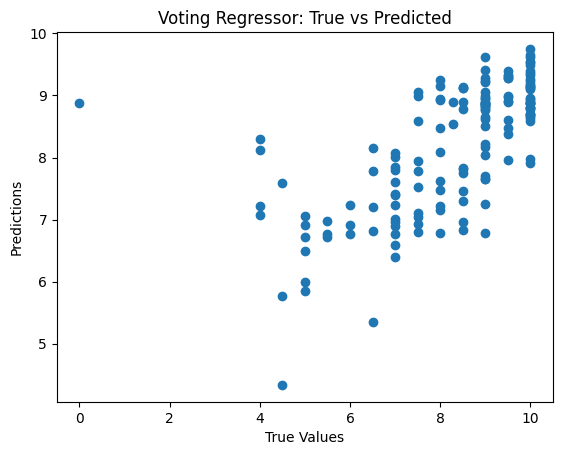

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import StandardScaler
# from catboost import CatBoostRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Chọn các đặc trưng số và y
numeric_features = df.select_dtypes(include=[np.number])
X = numeric_features.drop(['QT', 'username'] if 'username' in numeric_features.columns else ['QT'], axis=1)
y = df['QT']

# Chia dữ liệu QTành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo các mô hình
# catboost_model = CatBoostRegressor(iterations=500, depQT=10, learning_rate=0.05, random_state=42, silent=True)
xgb_model = xgb.XGBRegressor(n_estimators=130, learning_rate=0.1, max_depQT=10, random_state=42)
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Tạo mô hình VotingRegressor
voting_model = VotingRegressor(estimators=[
    # ('catboost', catboost_model),
    ('xgb', xgb_model),
    ('gbr', gbr_model)
])

# Huấn luyện mô hình với tập huấn luyện
voting_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred = voting_model.predict(X_test_scaled)

# Đánh giá mô hình
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Trực quan hóa kết quả
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Voting Regressor: True vs Predicted")
plt.show()


In [74]:
numeric_features = test.select_dtypes(include=[np.number])
X = numeric_features
y = df['QT']

# Normalize features
#X.drop(columns=['QT'], inplace=True)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


test['QT'] = voting_model.predict(X_scaled)
test = test[['username', 'QT']]
test.head()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


,username,QT
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,6.658405
20,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c,7.655771
68,0aaebc88f6106684d6993c156104c1ef36cf94e0,6.684457
80,0bf111a9caedf02804f6991792490e63bc21058a,8.073810
120,12887fd9a4df4ba9b88a71f3fb1d2502a75995dd,8.504665


In [75]:
test['QT'] = pd.to_numeric(test['QT'], errors='coerce')
test['QT'] = test['QT'].astype(float)

test.head()

,username,QT
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,6.658405
20,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c,7.655771
68,0aaebc88f6106684d6993c156104c1ef36cf94e0,6.684457
80,0bf111a9caedf02804f6991792490e63bc21058a,8.073810
120,12887fd9a4df4ba9b88a71f3fb1d2502a75995dd,8.504665


In [76]:
test.to_csv("Predict/predicted_QT.csv", index=False, header=False)